In [1]:
import pandas as pd
from PIL import Image
from scipy.integrate import odeint
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
# import mlflow
# import mlflow.pytorch
import pandas as pd

In [2]:
# Parameters
g = 9.81  # Acceleration due to gravity
# L=0.19
end_time = 5

# Create a one-dimensional time array
t = np.linspace(0, end_time, 500)
x = torch.tensor(t, dtype=torch.float32).view(-1, 1)

## ODE

In [3]:
# ODE function for a simple pendulum exact solution
def simple_pendulum_eqn(state, t, L, g):
    w = np.sqrt(g/L)
    k = w**2
    theta, theta_dot = state
    theta_ddot = -k*np.sin(theta)
    return [theta_dot, theta_ddot]

# Load the model

In [29]:
# my_model = torch.load("/Users/sergeygurvich/Desktop/real_data/mlruns/1/models/m-564d5474de4d4827b2a4040cc47a7ab4/artifacts/data/model.pth", weights_only=False)
my_model = torch.load("/Users/sergeygurvich/Desktop/real_data/mlruns/1/models/m-73221b2d28fa41078e2f624b6c2c50a8/artifacts/data/model.pth", weights_only=False)

# my_model.eval()  # set to evaluation mode

In [30]:
my_model

FCN(
  (fcs): Sequential(
    (0): Linear(in_features=3, out_features=32, bias=True)
    (1): Tanh()
  )
  (fch): Sequential(
    (0): Sequential(
      (0): Linear(in_features=32, out_features=32, bias=True)
      (1): Tanh()
    )
    (1): Sequential(
      (0): Linear(in_features=32, out_features=32, bias=True)
      (1): Tanh()
    )
  )
  (fce): Linear(in_features=32, out_features=1, bias=True)
)

## Make predictions

In [31]:
df = pd.read_csv('data/curated_data/l09_pi4_5s.csv')
df.head(1).length.values[0]

np.float64(0.09)

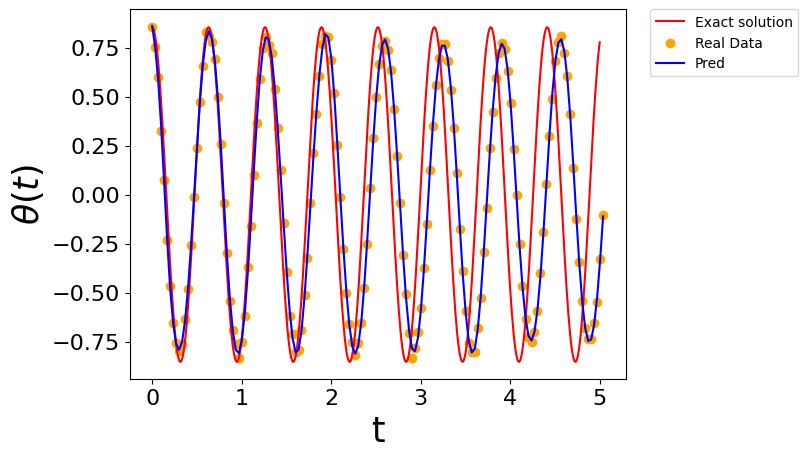

In [32]:
# start_angle = np.pi/2
start_angle = df.head(1).start_angle.values[0]
L = df.head(1).length.values[0]
initial_state = [start_angle, 0]
states = odeint(simple_pendulum_eqn, initial_state, t, args=(L, g))
y = torch.tensor(states[:, 0], dtype=torch.float32).view(-1, 1)

with torch.no_grad():
    predictions = my_model(torch.tensor(df[['t','length', 'start_angle']].values, dtype=torch.float32))

plt.plot(x, y, label='Exact solution', color='red')
plt.scatter(df['t'], df['theta'], label='Real Data', color='orange')
plt.plot(df['t'], predictions, label='Pred', color='blue')
plt.xlabel('t', fontsize=25)
plt.ylabel(r'$\theta(t)$', fontsize=25)
plt.tick_params(labelsize=16)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()